In [1]:
import os
import cv2
import random
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

In [2]:
base_folder = './data/subset_homework'

human_labels = ['30', '50']
random.seed(100)
np.random.seed(100)

# Load samples
def load_samples(class_folder, class_index):
    file_names = os.listdir(os.path.join(base_folder, class_folder))
    file_names.sort()
    images = [cv2.imread(os.path.join(base_folder, class_folder, f), cv2.IMREAD_UNCHANGED) for f in file_names]
    labels = [class_index] * len(images)

    print(f"Class {class_index} ({human_labels[class_index]}): samples: {len(images)}, sample size: {images[0].shape}")
    return (images, labels)

def show_samples(images, labels):
    for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
        plt.subplot(2,5,cnt+1)
        plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
        plt.title(human_labels[labels[idx]]), plt.axis(False)

Class 0 (30): samples: 2220, sample size: (28, 28)


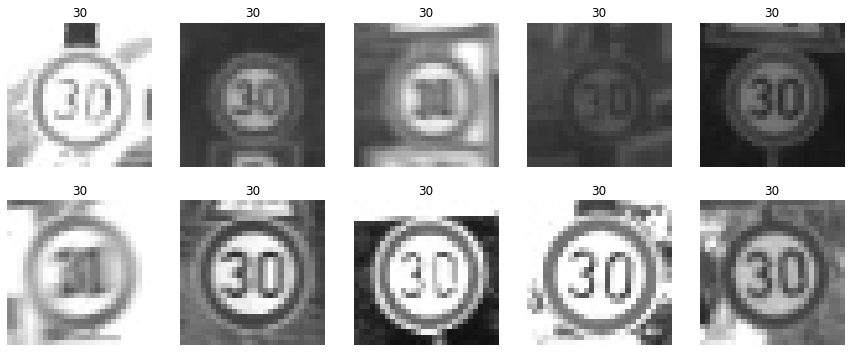

In [3]:
images_0, labels_0 = load_samples('class_id_0', 0)
show_samples(images_0, labels_0)

Class 1 (50): samples: 2250, sample size: (28, 28)


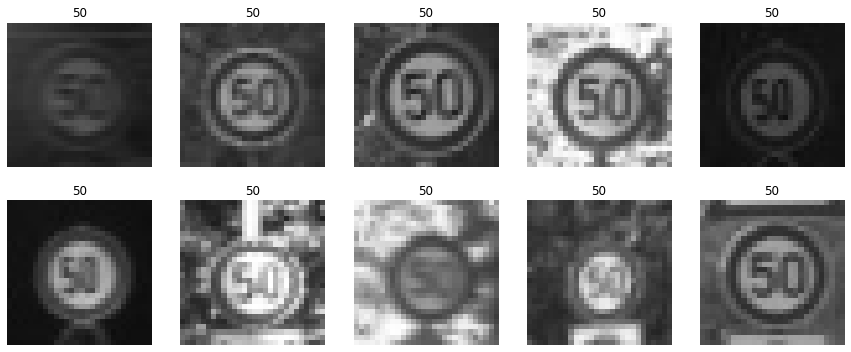

In [4]:
images_1, labels_1 = load_samples('class_id_1', 1)
show_samples(images_1, labels_1)

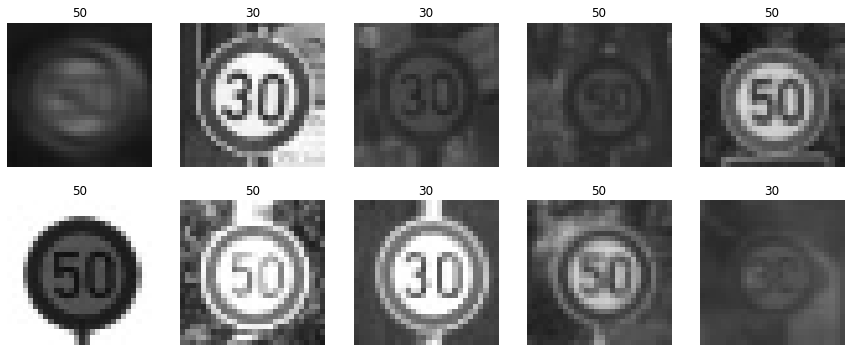

In [5]:
# Make training set
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels, random_state=1)

images = np.array(images)
labels = np.array(labels)

pixels = np.array([image.flatten() for image in images])/255.0

show_samples(images, labels)

In [6]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.random import set_seed
set_seed(2)

def train(inputs, outputs):
    model = Model(inputs, outputs)

    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(pixels, labels, epochs=50, batch_size=42)
    return (model, history.history)

In [7]:
# Train different models
inputs1 = Input(shape=(pixels.shape[1]))
outputs1 = Dense(1, activation="linear")(inputs1)
m1, h1 = train(inputs1, outputs1)

inputs2 = Input(shape=(pixels.shape[1]))
hidden2 = Dense(10, activation="relu")(inputs2)
outputs2 = Dense(1, activation="linear")(hidden2)
m2, h2 = train(inputs2, outputs2)

inputs3 = Input(shape=(pixels.shape[1]))
hidden3 = Dense(28, activation="relu")(inputs3)
outputs3 = Dense(1, activation="sigmoid")(hidden3)
m3, h3 = train(inputs3, outputs3)

inputs4 = Input(shape=(pixels.shape[1]))
hidden4 = Dense(50, activation="tanh")(inputs4)
outputs4 = Dense(1, activation="sigmoid")(hidden4)
m4, h4 = train(inputs4, outputs4)

inputs5 = Input(shape=(pixels.shape[1]))
hidden5_1 = Dense(20, activation="tanh")(inputs5)
hidden5_2 = Dense(20, activation="relu")(hidden5_1)
outputs5 = Dense(1, activation="sigmoid")(hidden5_2)
m5, h5 = train(inputs5, outputs5)

Epoch 1/50
107/107 [==============================] - 1s 2ms/step - loss: 0.2833
Epoch 2/50
107/107 [==============================] - 0s 1ms/step - loss: 0.2168
Epoch 3/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1765
Epoch 4/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 5/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1422
Epoch 6/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1269
Epoch 7/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1177
Epoch 8/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1110
Epoch 9/50
107/107 [==============================] - 0s 2ms/step - loss: 0.1075
Epoch 10/50
107/107 [==============================] - 0s 1ms/step - loss: 0.1027
Epoch 11/50
107/107 [==============================] - 0s 1ms/step - loss: 0.0978
Epoch 12/50
107/107 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 13/50
107/107 [====

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

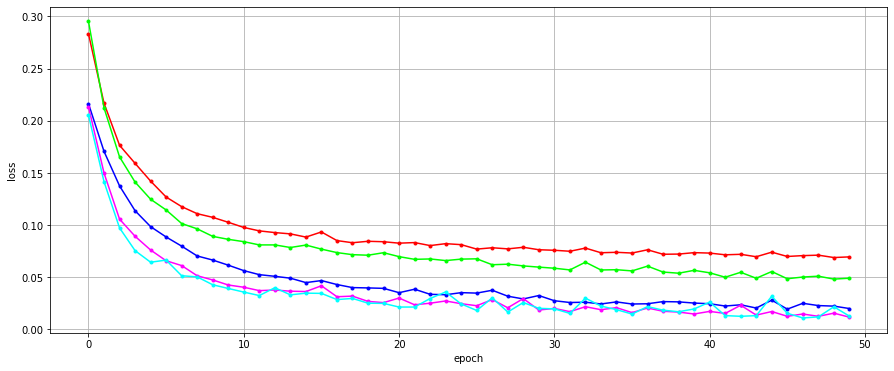

In [8]:
# Dirrerences of loss function for different models
histories = [h1, h2, h3, h4, h5]
colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff','#00ffff']

epochs = range(len(h1['loss']))
for i in range(0, len(histories)):
    plt.plot(epochs, histories[i]['loss'], '.-',  color=colors[i]), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [9]:
def get_accuracy(model):
    predictions = model.predict(pixels).squeeze()
    predictions = predictions > 0.5

    correct = 0
    for prediction, label in zip(predictions, labels):
        if prediction == label:
            correct = correct + 1

    return correct/len(labels)

140/140 [==============================] - 0s 1ms/step
Accuracies: [0.9720357941834452, 0.9727069351230425, 0.9850111856823266, 0.9917225950782997, 0.9948545861297539]


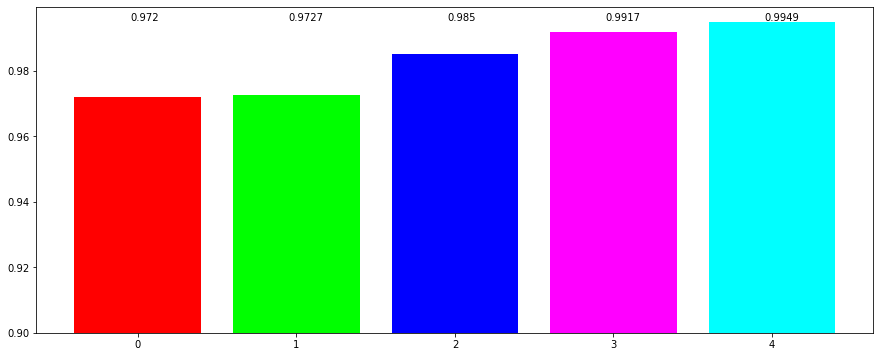

In [10]:
# Show accuracies
accuracies = [get_accuracy(m1), get_accuracy(m2), get_accuracy(m3), get_accuracy(m4), get_accuracy(m5)]
print('Accuracies:', accuracies)

bottom = 0.9
for i in range(0, len(accuracies)):
    plt.bar(i, accuracies[i]-bottom, color=colors[i], bottom=bottom)
    plt.text(i-0.05, 0.9955, str(round(accuracies[i], 4)))

Each class has 2250 samples. 

The best accuracy that I could achive with 1 neuron in 1 layer is around 0.97. 

In general the best accuracy that I could achieve with this kind of architecture is the ~0.995 for my fifth model. But this result is not stable for different random seeds and look pretty randomly depends on samples order using while model is train.